### INTRODUCTION:


*   In this Project i am going to analyse the electronics sales data.

*   I am going to follow the 6 step analysis process which are;
      
      1. Ask
      
      2. Prepare

      3. Process

      4. Analyze

      5. Share

      6. Act

### **ASK:**

 
*  **Stakeholders:** Here from my learnings i want to consider the key 
stakeholders as this project was  my own interest i did not conside them but it is good to consider in other scenarios. 
* **Buisness task:**
  Here i just asked questions myself after looking at the dataset as follows:

        1. which month has the largest sales ?
        2. which day has the largest sales ?
        3. which time of the day users are active ?
        4. what was the top 10 most ordered combos ?
        5. what was the  most ordered product and why ?






###**PREPARE AND PROCESS :**



1.   I am using **numpy** and **pandas** for data cleaning , data processing , and data analysis.which also includes data manipulation & data wrangling.
2.   **Seaborn** and **matplotlib** for data visualization to share my analysis.



**Importing the required packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data acquisition:**

Here i am using the 12 month electronics sales [dataset](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data)

I am using  glob module to import multiple csv files from folder ,but you can also use os module to import  the same.



 




In [ ]:
from glob import glob
files = glob('/content/drive/MyDrive/Sales_Data/Sales*')

Merging the 12 months data into a single annual data using concat()

In [ ]:
annual_file = pd.concat(pd.read_csv(file) for file in files)

creating  a dataframe

In [ ]:
df  = pd.DataFrame(annual_file)

To get an overview i am using the head(), tail(0) and info() methods,also we can use sample which will give a random ones.

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"
20378,278796,Wired Headphones,1,11.99,10/13/19 11:20,"547 Jefferson St, Los Angeles, CA 90001"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


**Cleaning the data:**

For my ease of data handling, i am converting the column names into a snakecase format

In [ ]:
df.columns = [x.lower() for x in df.columns]

In [ ]:
df.columns = df.columns.str.replace(" ","_")

Checking whether the data frame has null values

In [ ]:
df.isna().sum()


order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64

Dropping the null values

In [ ]:

df = df.dropna()

confirming whether everything goes well

In [ ]:
 df.isna().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

Dropping the unwanted values which is similar to Null values i would  say it as missing values

In [ ]:
drop_cond = df["order_id"] == "Order ID"
df.drop(index=df[drop_cond].index,inplace=True)

converting the columns to the  desired data format for the effective processing to avoid errors in future.

In [ ]:
df[["order_id","quantity_ordered"]] = df[["order_id","quantity_ordered"]].astype(int)

In [ ]:
df["price_each"] = df["price_each"].astype(float)

In [ ]:
df["order_date"]= pd.to_datetime(df["order_date"])           

In [ ]:
df["order_date"]

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
20374   2019-10-12 04:32:00
20375   2019-10-28 22:00:00
20376   2019-10-09 20:58:00
20377   2019-10-31 17:21:00
20378   2019-10-13 11:20:00
Name: order_date, Length: 182735, dtype: datetime64[ns]

**Processing the data:**



1.    In order to know the sales by month i am creating the month column


  



 


 


 


In [ ]:
df["month"] = df["order_date"].dt.month

creating the total price column for knowing the sales

In [ ]:
df["total_price"] = df["quantity_ordered"] * df["price_each"]

In [ ]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


 2. Extracting city and state code


In [ ]:
df["city"] = df["purchase_address"].apply(lambda x : x.split(',')[1] )  

In [ ]:
df["state"] = df["purchase_address"].apply(lambda x : x.split(",")[2].split(" ")[1])

In [ ]:
df["state_city"] = df["city"] + "(" +df["state"] +")"

In [ ]:
df.drop(columns = ["state","city"],inplace=True)

  3. Extracting hour and weekday from datetime:

In [ ]:
df["hour"] = df["order_date"].dt.hour

In [ ]:
df["day"] = df["order_date"].dt.day_name()

In [ ]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_price,state_city,hour,day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,Tuesday


### **ANALYSE AND VISUALIZATION:**  







 



#### **1) (a) Total sales by month:**

In [ ]:
monthly_sales = df.groupby("month").sum()
monthly_sales.head()

,order_id,quantity_ordered,price_each,total_price,hour
month,,,,,
1,1391148846,10670,1776155.79,1786511.29,136503
2,1832181724,13162,2145208.87,2158127.48,169098
3,2520234917,16697,2740393.12,2755969.40,215186
4,3333217539,20226,3313522.35,3336376.42,258006
5,3289290354,18344,3084756.09,3101881.04,234770


using matplotlib's bar function:

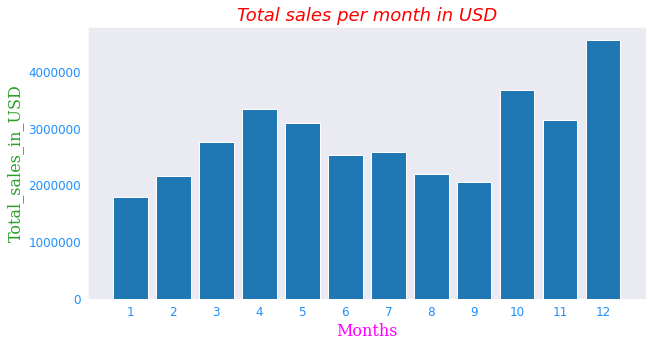

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(10,5))
plt.bar(monthly_sales.index,monthly_sales["total_price"])
plt.ticklabel_format(style = "plain")
font_1={"family":"serif","color":"magenta","fontsize":16}
font_2={"family":"serif","color":"tab:green","fontsize":16}
font_3={"family":"sans-serif","color":"red","fontsize":18,"weight":"normal","fontstyle":"oblique"}
plt.xticks(monthly_sales.index,weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 )
plt.yticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 )
plt.xlabel("Months",fontdict = font_1 )
plt.ylabel("Total_sales_in_USD",fontdict = font_2)
plt.title("Total sales per month in USD",fontdict = font_3);

using matplotlib's bar function:

#### **1) (b) Average sales by month:**

In [ ]:
mean_monthly_sales = df.groupby("month").mean()
mean_monthly_sales.head()
mean_monthly_sales.rename(columns={"total_price":"mean_price"},inplace=True)

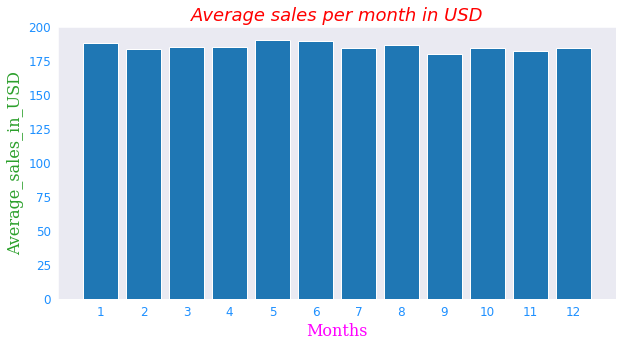

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(10,5))
plt.bar(mean_monthly_sales.index,mean_monthly_sales["mean_price"])
plt.ticklabel_format(style = "plain")
font_1={"family":"serif","color":"magenta","fontsize":16}
font_2={"family":"serif","color":"tab:green","fontsize":16}
font_3={"family":"sans-serif","color":"red","fontsize":18,"weight":"normal","fontstyle":"oblique"}
plt.xticks(mean_monthly_sales.index,weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 )
plt.yticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 )
plt.xlabel("Months",fontdict = font_1 )
plt.ylabel("Average_sales_in_USD",fontdict = font_2)
plt.title("Average sales per month in USD",fontdict = font_3);

#### **2) sales by days of the week:**

In [ ]:
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sales_by_day = df.groupby("day").sum().reindex(days)
sales_by_day.head()

,order_id,quantity_ordered,price_each,month,total_price,hour
day,,,,,,
Monday,6056689085,29366,4761499.62,187213,4793562.83,375410
Tuesday,6173418011,30159,4972908.86,189957,4999099.97,383716
Wednesday,5959752236,29257,4870466.03,180991,4898231.22,374096
Thursday,5981701017,29175,4725075.72,182728,4753750.41,374517
Friday,5943237467,28987,4749047.50,181846,4773941.31,373311


using seaborn's barplot function:

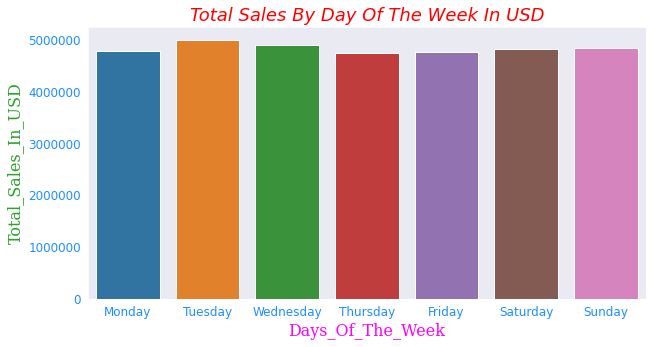

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_day.index,y="total_price",data=sales_by_day)
plt.ticklabel_format(style = "plain",axis="y")
plt.xlabel("Days_Of_The_Week",fontdict = font_1)
plt.ylabel("Total_Sales_In_USD",fontdict = font_2)
plt.title("Total Sales By Day Of The Week In USD",fontdict = font_3)
plt.xticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 )
plt.yticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 );

#### **3) Sales by cities:**

In [ ]:
city_sales = df.groupby("state_city").sum()
city_sales.head()

,order_id,quantity_ordered,price_each,month,total_price,hour
state_city,,,,,,
Atlanta(GA),3366679952,16304,2726247.35,103160,2741642.05,210462
Austin(TX),2238557673,10933,1777231.68,68570,1786745.52,139294
Boston(MA),4517043947,22123,3580075.00,138632,3604080.86,282781
Dallas(TX),3360280471,16453,2702619.12,102976,2717793.72,210879
Los Angeles(CA),6698824762,32722,5323915.79,204933,5354039.93,420439


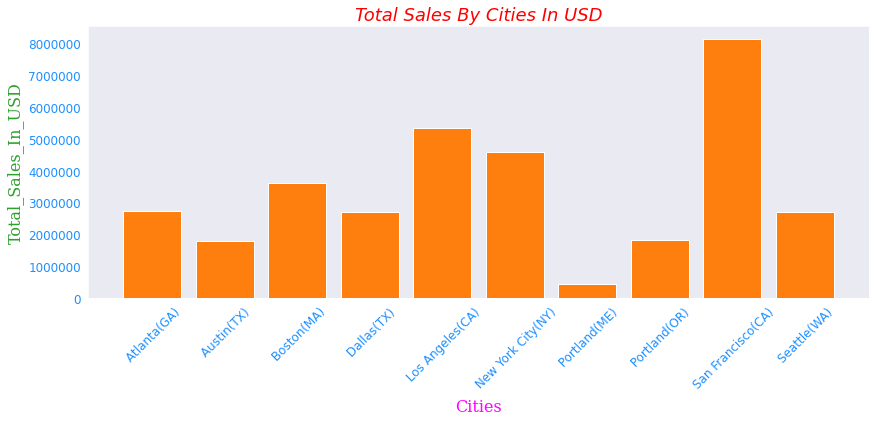

In [ ]:
plt.figure(figsize=(14,5))
plt.bar(city_sales.index,city_sales["total_price"],color="tab:orange")
plt.ticklabel_format(style = "plain",axis = "y")
plt.xticks(city_sales.index,rotation = 45,)
plt.xlabel("Cities",fontdict = font_1 )
plt.ylabel("Total_Sales_In_USD", fontdict = font_2)
plt.title("Total Sales By Cities In USD",fontdict = font_3)
plt.xticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 )
plt.yticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 );

#### **4) Sales by an hour of the day:**

In [ ]:
hourly_sales_and_order = df.groupby("hour").agg({"quantity_ordered":"sum","total_price":"sum","order_id":"count"})

i used both maplotlib's plot function to draw line over the bar produced by seaborn's barplot function:

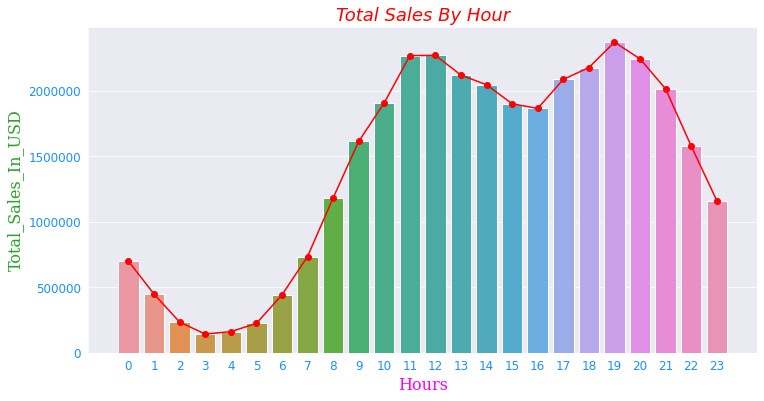

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.barplot(x=hourly_sales_and_order.index , y = "total_price",data=hourly_sales_and_order)
plt.plot(hourly_sales_and_order.index,hourly_sales_and_order["total_price"],"o-r")
plt.xlabel("Hours",fontdict= font_1)
plt.ylabel("Total_Sales_In_USD",fontdict= font_2)
plt.title("Total Sales By Hour",fontdict= font_3)
plt.ticklabel_format(style = "plain",axis = "y")
plt.xticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 )
plt.yticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 );

#### **5) Top 10 Most ordered combo (2 things) together :**

By using duplicated method we can see the duplicates together next to next on rows this is just for overview we can also proceed without using the duplicated method

In [ ]:
combo_df = df[df["order_id"].duplicated(keep=False)] 
combo_df.head()



,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_price,state_city,hour,day,combos
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,Friday,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,Friday,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19,Wednesday,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,Wednesday,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,Sunday,"Bose SoundSport Headphones,Bose SoundSport Hea..."


i am joining the products together by grouping them on order_id.

In [ ]:

combo_df["combos"] = combo_df.groupby("order_id")["product"].transform(lambda x : ','.join(x))

<ipython-input-45-35703906d5e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_df["combos"] = combo_df.groupby("order_id")["product"].transform(lambda x : ','.join(x))


In [ ]:
combo_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_price,state_city,hour,day,combos
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,Friday,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,Friday,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19,Wednesday,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,Wednesday,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,Sunday,"Bose SoundSport Headphones,Bose SoundSport Hea..."


Dropping the duplicates since it will be applied on  all the observations  which is not needed and having only the combos and order_id now.

In [ ]:
combo_df = combo_df[["order_id","combos"]].drop_duplicates()

In [ ]:
combo_df.head()

,order_id,combos
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


I am using combinations() method to get the combination and counter() method to count the combinations.


In [ ]:
from itertools import combinations
from collections import Counter

counting  = Counter()

for i in combo_df["combos"]:
  sub_list = i.split(",")
  counting.update(Counter(combinations(sub_list,2))) # i am using 2 inside combination beacaus i want 2 things ordered together,
                                                     # but if you want 3 you can change it 3 or any number.

Printing the top 10 most commonly ordered things togehter

In [ ]:
for key , value in counting.most_common(10):
  print(key, value) 

('iPhone', 'Lightning Charging Cable') 2066
('Google Phone', 'USB-C Charging Cable') 2042
('iPhone', 'Wired Headphones') 963
('Google Phone', 'Wired Headphones') 916
('iPhone', 'Apple Airpods Headphones') 760
('Vareebadd Phone', 'USB-C Charging Cable') 745
('Google Phone', 'Bose SoundSport Headphones') 500
('USB-C Charging Cable', 'Wired Headphones') 436
('Vareebadd Phone', 'Wired Headphones') 321
('Lightning Charging Cable', 'Wired Headphones') 250


As the counter gives output  similar to as dictionary so  iam converting into a dataframe.

In [ ]:
counting_df  =pd.DataFrame.from_dict(counting,orient="index").reset_index()

In [ ]:
counting_df.rename(columns={"index":"combos",0:"no_of_times_ordered"},inplace=True) 

In [ ]:
counting_df.sort_values(by="no_of_times_ordered",ascending=False)

,combos,no_of_times_ordered
8,"(iPhone, Lightning Charging Cable)",2066
1,"(Google Phone, USB-C Charging Cable)",2042
13,"(iPhone, Wired Headphones)",963
0,"(Google Phone, Wired Headphones)",916
16,"(iPhone, Apple Airpods Headphones)",760
...,...,...
130,"(27in FHD Monitor, iPhone)",2
276,"(Google Phone, Flatscreen TV)",2
127,"(ThinkPad Laptop, Macbook Pro Laptop)",2
279,"(27in FHD Monitor, LG Washing Machine)",2


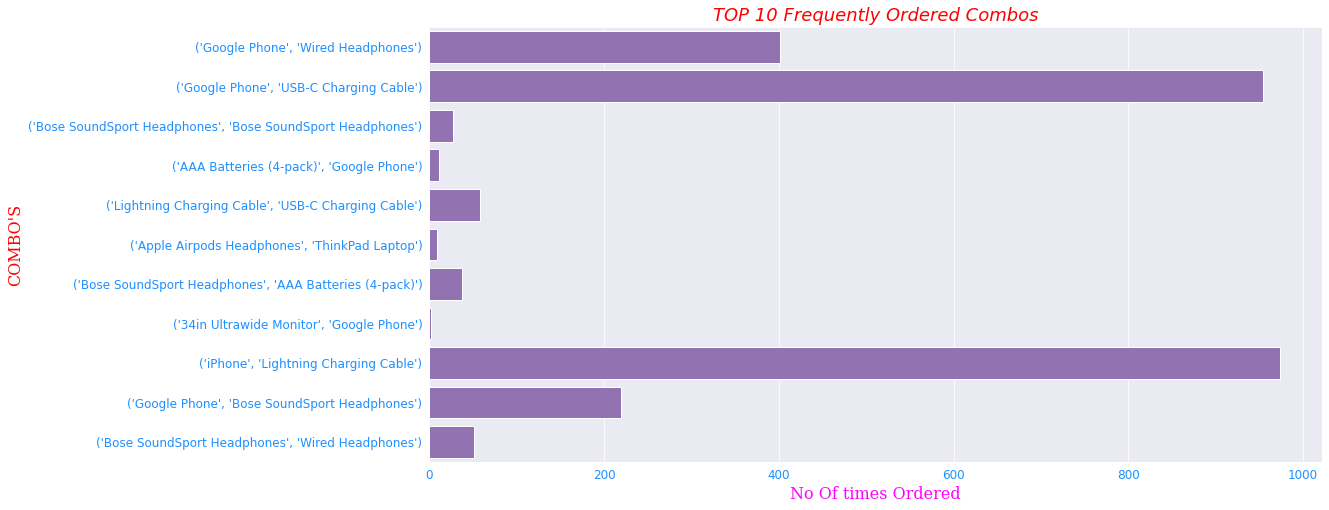

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
sns.barplot(x = counting_df.loc[0:10,"no_of_times_ordered"],y = counting_df.loc[0:10,"combos"],data=counting_df,color="tab:purple")
plt.ylabel("COMBO'S",color="red",fontdict= font_2  )
plt.xlabel('No Of times Ordered',fontdict= font_1 )
plt.title("TOP 10 Frequently Ordered Combos",fontdict= font_3 )
plt.xticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 )
plt.yticks(weight="normal",fontname="sans-serif",color="dodgerblue",fontsize=12 );


#### **6) (Total quantity ordered vs average price ) by products:**

In [ ]:
product_group = df.groupby('product') 
product_ordered = product_group.agg({"quantity_ordered":"sum","price_each":"mean"})

I am using subplots and twinx() method to plot 2 yaxis in a same visual

<ipython-input-217-0e37c4eca209>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_ordered.index, rotation=90,color="blue",fontsize=12)


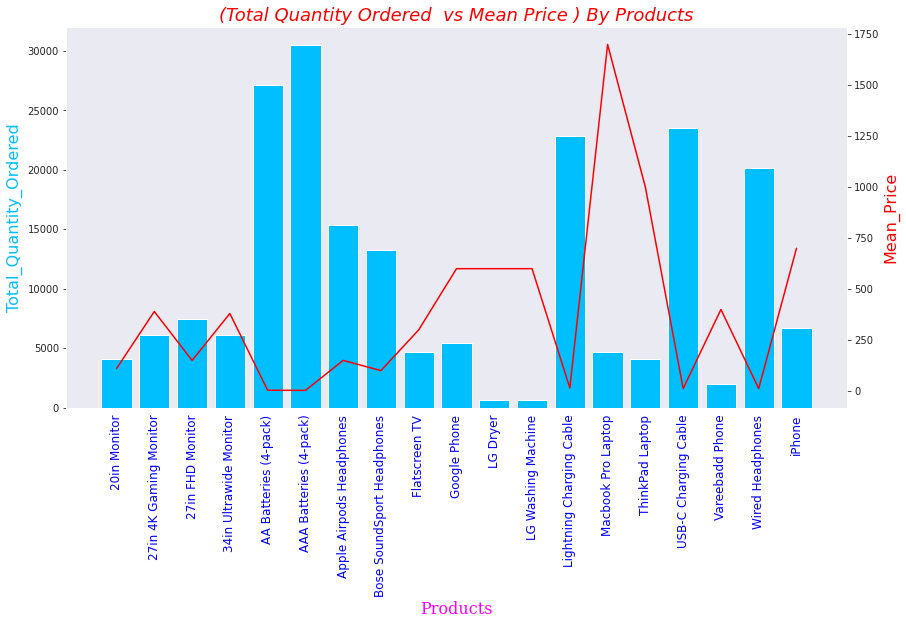

In [ ]:
fig,ax1 = plt.subplots(figsize=(14,7))
ax1.bar( product_ordered.index , product_ordered["quantity_ordered"],color="deepskyblue" )
ax1.set_xlabel("Products",fontdict=font_1)
ax1.set_ylabel("Total_Quantity_Ordered",color="deepskyblue",fontsize=16)
ax2=ax1.twinx()
ax2.plot(product_ordered.index, product_ordered["price_each"],color="r")
ax2.set_ylabel("Mean_Price",color="r",fontsize=16)
ax2.grid(False)
ax1.grid(False)
ax1.set_xticklabels(product_ordered.index, rotation=90,color="blue",fontsize=12)
ax1.set_title("(Total Quantity Ordered  vs Mean Price ) By Products",fontdict=font_3 );


**Note**: I had applied  the simple sum function , count and mean fucntion on above exploratory data analysis ,but i believe we can also use other stastical and probablistic computations 

### **ACT:**

#### **Findings of my analysis:**
  

1. **December** had the largest sales of the year 2019 of greater than **4million USD**
2.  Almost every **day of the week** had the **constant** sales range of **4.5 million to 4.8 million USD**
3. **San Francisco** had the largest sales nearest to **8 million USD**
4. **Users** were **more active**  between **11.00 am and 13.00 pm** in day time and also **more active** between **19.00 pm to 21.00 pm** after sunset.
5. (**iPhone,Lightning Charging Cable**) was the most frequently ordered combo of **2066 times**
6. **AA and AAA batteries** (4pack) were the most ordered product of more than **25000 times** as the **average** price of **2.99 **and **3.84 USD** which  is lowest of all. 
